# Heart Failure Prediction

<img src = "images/heart_failure.jpg">

Heart failure is a serious medical condition in which your heart muscle doesn't pump blood as well as it should. Pre-existing conditions, such as narrowed arteries or high blood pressure, can eventually leave the heart too weak (or stiff) to fill properly. Symptoms may include, but are not limited to, the following: shortness of breath, fatigue, rapid or irregular heart beat, reduced ability to exercise, etc.  
  
Given that cardiovascular disesases (CDC), such as heart failure, are the number 1 cause of death globally, the ability for healthcare practicioners to accurately predict mortality due to heart failure would be a major benefit. These predictive tools would help the end user identify at risk individuals, where early detection detection assisted by a machine learning model would be of great help.

#### References
The dataset for this analysis was originally published by Chicco and Jurman 2020, and made publicly accessible on kaggle. The full citation and hyperlink are as follows:  
  
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).  
  
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
# import libraries
## general use
import numpy as np
import pandas as pd

## plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px # this package is amazing!!!
import plotly.graph_objs as gobj
from colorama import Fore, Back, Style
import plotly.figure_factory as ff

## machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## other
import warnings
from statsmodels.formula.api import ols

## load
init_notebook_mode(connected = True)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.shape

(299, 13)

__How to read the columns__
 - Sex: Gender of the patient. 1 = Male, 0 = Female
 - Age: Age of the patient.
 - Diabetes: 0 = No, 1 = Yes
 - Anaemia: 0 = No, 1 = Yes
 - High Blood Pressure: 0 = No, 1 = Yes
 - Smoking: 0 = No, 1 = Yes
 - DEATH_EVENT: The target parameter. 0 = No, 1 = Yes

## Exploratory Analysis

## Heatmap of all variables
  
Exploratory analysis of this dataset is performed to assess which available variables would serve as the best features to train the prospective machine learning model. To that end, the first step is to create a correlation heatmap to assess which variables are most strongly correlated with the target column 'DEATH_EVENT'.

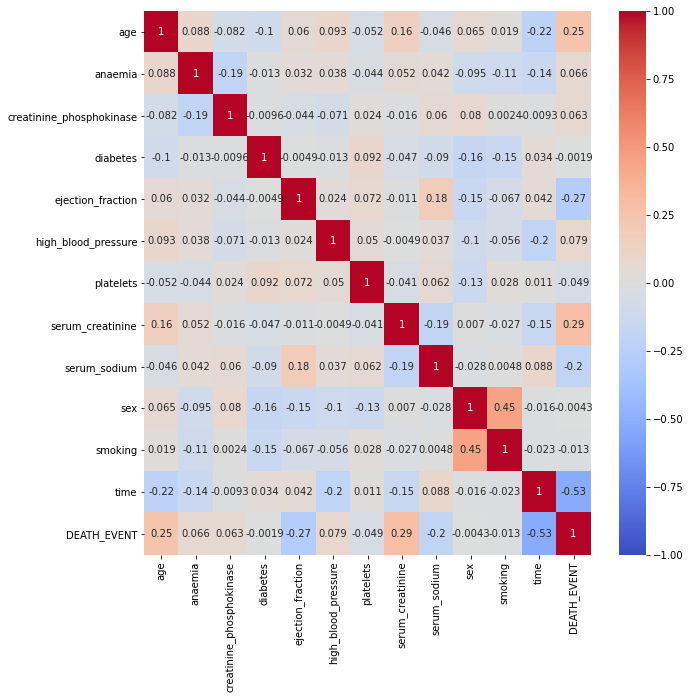

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), vmin = -1, cmap = 'coolwarm', annot = True);

Based on the heatmap, the variables which are most strongly correlated to 'DEATH_EVENT', regardless of whether they are positively or negatively correlated, are as foolws (in descending order of correlation):  
 - Time (-0.53)
 - Serum Creatinine (0.29)
 - Ejection Fraction (0.27)
 - Age (0.25)
 - Serum Sodium (-0.2)

While 'Time' is the most strongly correlated to 'DEATH_EVENT', any machine learning model trained on this data should _not_ use 'Time' as a feature due to data leakage. Specifically, the 'Time' column designated either when the patient died ('DEATH_EVENT' = 1), or when the scientists lost contact with the patient (a.k.a censored, 'DEATH_EVENT' = 0). Once the model is deployed, anybody using the model will not be able to use 'Time' as a predictor.

## Relationship between Serum Creatinine and DEATH_EVENT

Creatinine is a chemical waste product that is produced as bi-product of muscle metabolism and and to a lesser extent due to eating meat. High serum creatinine levels are indicative of potentially unhealthy kidneys, as healthy kidneys are effeective at filtering out creatinine through urine.

_[ADD A PARAGRAPH WHICH DESCRIBES WHY THERE MIGHT BE A REALTIONSHIP BETWEEN SERUM CREATININE AND HEART FAILURE]_

In [47]:
# histogram
fig = px.histogram(df, x = 'serum_creatinine', color = 'DEATH_EVENT',
                   marginal = 'violin', hover_data = df.columns)
fig.update_layout(
    title_text = 'Distribution of serum_creatinine by heart failure survival status')
fig.show()

In [48]:
# distplot
dead_sc = df[df['DEATH_EVENT'] == 1]['serum_creatinine']
alive_sc = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
hist_data4 = [dead_sc, alive_sc]
labels = ['Not Survived', 'Survived']

fig = ff.create_distplot(hist_data4, group_labels = labels, bin_size = 0.5)
fig.update_layout(title_text = 'Analysis of serum creatinine on heart failure survival status')
fig.show()

'Survived' group more heavily concentrated at the lower end of the spectrum. 'Not Survived' has a longer tail.

## Relationship between Ejection Fraction and DEATH_EVENT

Ejection fraction is a measurement of the blood leaving the heart each time it contracts. Each contraction of the heart results in a certain amount of the blood being pumped out. After the contraction, there is a relaxation phase in which the ventricles of the heart refill with blood. The term "ejection fraction" refers to the percentage of blood that's pumped out of a filled ventricle with each heartbeat.

_[ADD A PARAGRAPH WHICH DESCRIBES WHY THERE MIGHT BE A RELATIONSHIP BETWEEN EJECTION FRACTION AND HEART FAILURE]_

In [49]:
# histogram
fig = px.histogram(df, x = 'ejection_fraction', color = 'DEATH_EVENT',
                  marginal = 'violin', hover_data = df.columns)
fig.update_layout(
    title_text = 'Distribution of ejection fraction by survival status')
fig.show()

In [50]:
# distplot
dead_ef = df[df['DEATH_EVENT'] == 1]['ejection_fraction']
alive_ef = df[df['DEATH_EVENT'] == 0]['ejection_fraction']
hist_data2 = [dead_ef, alive_ef]
labels = ['Not Survived', 'Survived']

fig = ff.create_distplot(hist_data2, group_labels = labels, bin_size = 0.5)
fig.update_layout(title_text = 'Analysis of ejection fraction on heart failure survival status')
fig.show()

'Not Survived' group appears to have a wider distribution, with most results concentrated at the lower end of the spectrum.

## Relationship between Age and DEATH_EVENT

## Relationship between Serum Sodium and DEATH_EVENT

## Auxilary exploratory analysis of other variables of interest

# RESTRUCTURE THE BELOW CELLS

### Relationship between age and sex with regards to Death Event

In [11]:
fig = px.violin(df, x = 'sex', y = 'age', color = 'DEATH_EVENT', points = 'all',
               box = True, hover_data = df.columns)
fig.update_layout(
    title_text = "Analysis of  (Female = 0, Male = 1)")
fig

 - Age appears to play a more prominent role in heart failure mortality in men than in women.  
 - Survival appears to be concentrated in females around the ages of 60 to 70, and concentrated between 50 to 60 in males.

In [12]:
# split df by 'male and female' and by 'death or not'
male_dead = df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1)]
male_alive = df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 0)]
female_dead = df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 1)]
female_alive = df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 0)]

labs = ['Male - Dead', 'Male - Alive', 'Female - Dead', 'Female - Alive']
values = [len(male_dead), len(male_alive), len(female_dead), len(female_alive)]

fig = go.Figure(data = [go.Pie(labels = labs, values = values, hole = .4)])
fig.update_layout(
    title_text = 'Analysis of Survival by Gender')
fig

In [13]:
# split by death event, keeping age
dead_age = df[df['DEATH_EVENT'] == 1]['age']
alive_age = df[df['DEATH_EVENT'] == 0]['age']

# join the two lists by hist_data = [list1, list2]
hist_data = [dead_age, alive_age]

# plot using px.create_distplot
fig = ff.create_distplot(hist_data, group_labels = ['dead', 'alive'])
fig.update_layout(
    title_text = "Distribution of heart failure survival by age")
fig

### Relationship between age and smoking with regards to Death Event

In [14]:
fig = px.violin(df, x = 'smoking', y = 'age', color = 'DEATH_EVENT', points = 'all',
               box = True, hover_data = df.columns)
fig.update_layout(
    title_text = 'Analysis of smoking and age on Survival Status')

For smokers, average age of patients who died due to heart failure appear to be older than the smokers in the dataset who survived.

### Relationship between diabetes, age, and heart rate survival status

In [15]:
fig = px.violin(df, x = 'diabetes', y = 'age', color = 'DEATH_EVENT', points = 'all',
               box = True, hover_data = df.columns)
fig.update_layout(
    title_text = 'Analysis of diabetes and age with regards to Heart Failure Survival Status')

### Relationship between high blood pressure, age, and heart failure survival status

In [16]:
fig = px.violin(df, x = 'high_blood_pressure', y = 'age', color = 'DEATH_EVENT', points = 'all',
               box = True, hover_data = df.columns)
fig.update_layout(
    title_text = 'Analysis of high blood pressure and age with regards to Heart Failure Survival Status')

## Analysis of quantitative measures

### Creatinine Phosphokinase

In [17]:
fig = px.histogram(df, x = 'creatinine_phosphokinase', color = 'DEATH_EVENT',
                  marginal = 'violin', hover_data = df.columns)
fig.update_layout(
    title_text = 'Distribution of creatinine phosphokinase by survival status')
fig.show()

In [18]:
dead_cp = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase']
alive_cp = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase']
hist_data1 = [dead_cp, alive_cp]
labels = ['Not Survived', 'Survived']

fig = ff.create_distplot(hist_data1, group_labels = labels, bin_size = 0.5)
fig.update_layout(
    title_text = 'Analysis of creatinine phosphokinase on heart failure survival status')
fig.show()

No great difference observed between the two groups. If anything the wider range observed in the 'Not Survived'  is distinct.

### Platelets

In [21]:
fig = px.histogram(df, x = 'platelets', color = 'DEATH_EVENT',
                   marginal = 'violin', hover_data = df.columns)
fig.update_layout(
    title_text = 'Distribution of platelets by heart failure survival status')
fig.show()

No great difference in distribution seen here.

### Serum Sodium

In [24]:
fig = px.histogram(df, x = 'serum_sodium', color = 'DEATH_EVENT',
                   marginal = 'violin', hover_data = df.columns)
fig.update_layout(
    title_text = 'Distribution of serum_sodium by heart failure survival status')
fig.show()

In [25]:
dead_ss = df[df['DEATH_EVENT'] == 1]['serum_sodium']
alive_ss = df[df['DEATH_EVENT'] == 0]['serum_sodium']
hist_data5 = [dead_ss, alive_ss]
labels = ['Not Survived', 'Survived']

fig = ff.create_distplot(hist_data5, group_labels = labels, bin_size = 0.5)
fig.update_layout(title_text = 'Analysis of serum sodium on heart failure survival status')
fig.show()

Distributions appear to be noticeably different, with both being approximately normally distributed and 'Survived' having higher serum sodium.

# Heart Failure Survival Prediction

## Prepare the data: train test split

In [26]:
Features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
X = df[Features]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15)

This is health care data, where false negatives (Type II Error) need to be minimized. After all, we wouldn't want somebody who is at risk of dying due to heart failure to be treated as if they would survive such an event! As such, the evaluation metric of preference for model selection will be based on the ROC AUC Score.

In [27]:
auroc_list = []

## Trial and Error for Different Machine Learning Models

### Logistic Regression

In [28]:
# define model and parameters to search by
model_lr = LogisticRegression()
params = {'C': [.1, 1, 5, 10, 20, 50, 100, 1000]}

# fit grid search model
grid_model_lr = GridSearchCV(model_lr, param_grid = params, scoring = 'roc_auc')
grid_model_lr.fit(X_train, y_train)
grid_model_lr_pred = grid_model_lr.predict(X_test)
y_decision_fn_scores_acc = grid_model_lr.decision_function(X_test)
grid_model_lr_auc = roc_auc_score(y_test, y_decision_fn_scores_acc)

# print results
print('Test set AUC: ', grid_model_lr_auc)
print('Grid best parameter (max. AUC): ', grid_model_lr.best_params_)
print('Grid best score (AUC): ', grid_model_lr.best_score_)

Test set AUC:  0.7466555183946488
Grid best parameter (max. AUC):  {'C': 10}
Grid best score (AUC):  0.7938894009216589


In [29]:
# add to aucscore list
auroc_list.append(100*grid_model_lr_auc)

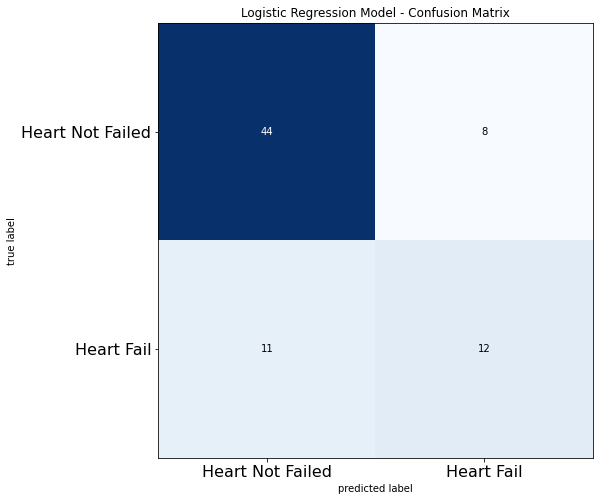

In [30]:
cm = confusion_matrix(y_test, grid_model_lr_pred)
#plt.figure()
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

### Support Vector

In [31]:
# define model and parameters to search by
model_svc = SVC()
params = {'C': [.1, 1, 5, 10, 20, 30, 40, 50, 100, 1000]}

# fit grid search model
grid_model_svc = GridSearchCV(model_svc, param_grid = params, scoring = 'roc_auc')
grid_model_svc.fit(X_train, y_train)
grid_model_svc_pred = grid_model_svc.predict(X_test)
y_decision_fn_scores_acc = grid_model_svc.decision_function(X_test)
grid_model_svc_auc = roc_auc_score(y_test, y_decision_fn_scores_acc)

# print results
print('Test set AUC: ', grid_model_svc_auc)
print('Grid best parameter (max. AUC): ', grid_model_svc.best_params_)
print('Grid best score (AUC): ', grid_model_svc.best_score_)

Test set AUC:  0.7675585284280936
Grid best parameter (max. AUC):  {'C': 30}
Grid best score (AUC):  0.8073947772657449


In [32]:
# add to aucscore list
auroc_list.append(100*grid_model_svc_auc)

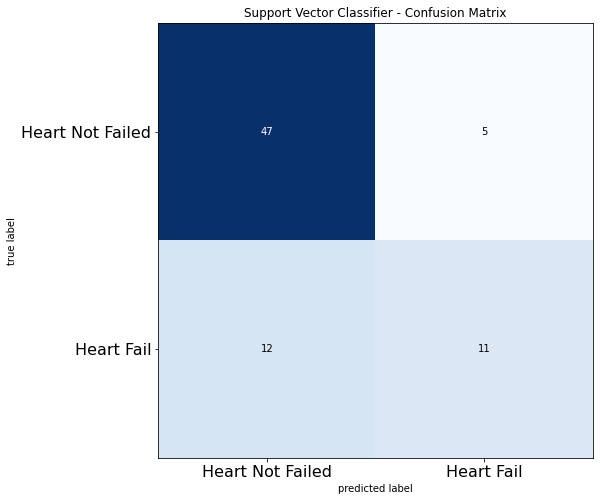

In [33]:
# define confusion matrix by y_test and X_test prediction
cm = confusion_matrix(y_test, grid_model_svc_pred)
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Support Vector Classifier - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

### K Neighbors Classifier

In [34]:
# define model and parameters to search by
model_knn = KNeighborsClassifier()
params = {'n_neighbors': [1,5,10,15,20]}

# fit grid search model
grid_model_knn = GridSearchCV(model_knn, param_grid = params, scoring = 'roc_auc')
grid_model_knn.fit(X_train, y_train)
grid_model_knn_pred = grid_model_knn.predict(X_test)
#y_decision_fn_scores_acc = grid_model_knn.decision_function(X_test) #KNN does not support decision function
grid_model_knn_auc = roc_auc_score(y_test, grid_model_knn_pred)

# print results
print('Test set AUC: ', grid_model_knn_auc)
print('Grid best parameter (max. AUC): ', grid_model_knn.best_params_)
print('Grid best score (AUC): ', grid_model_knn.best_score_)

Test set AUC:  0.6354515050167224
Grid best parameter (max. AUC):  {'n_neighbors': 10}
Grid best score (AUC):  0.7487793138760881


In [35]:
# add to aucscore list
auroc_list.append(100*grid_model_knn_auc)

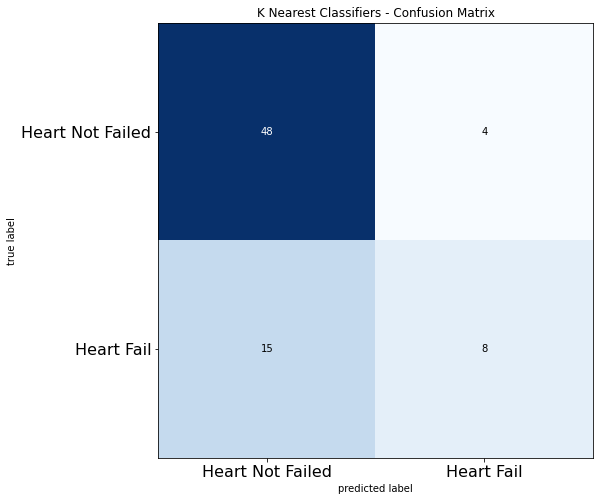

In [36]:
# define confusion matrix by y_test and X_test prediction
cm = confusion_matrix(y_test, grid_model_knn_pred)
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("K Nearest Classifiers - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

### Decision Tree Classifier

In [37]:
# define model and parameters to search by
model_tree = DecisionTreeClassifier()
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
         'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
         'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

# fit grid search model
grid_model_tree = GridSearchCV(model_tree, param_grid = params, scoring = 'roc_auc')
grid_model_tree.fit(X_train, y_train)
grid_model_tree_pred = grid_model_tree.predict(X_test)
#y_decision_fn_scores_acc = grid_model_tree.decision_function(X_test)
grid_model_tree_auc = roc_auc_score(y_test, grid_model_tree_pred)

# print results
print('Test set AUC: ', grid_model_tree_auc)
print('Grid best parameter (max. AUC): ', grid_model_tree.best_params_)
print('Grid best score (AUC): ', grid_model_tree.best_score_)

Test set AUC:  0.717809364548495
Grid best parameter (max. AUC):  {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 4}
Grid best score (AUC):  0.7538361495135689


In [38]:
# add to aucscore list
auroc_list.append(100*grid_model_tree_auc)

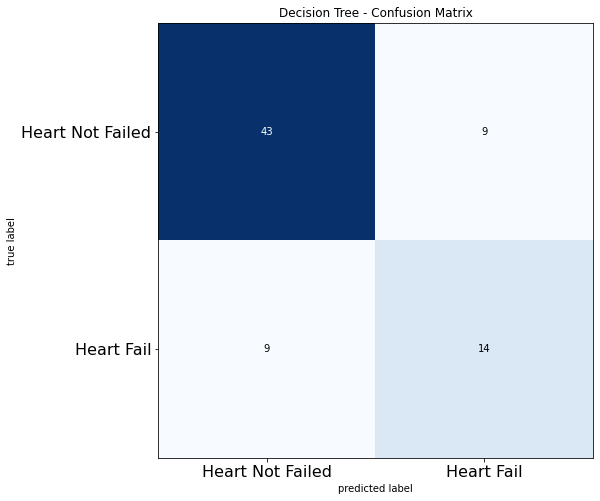

In [39]:
# define confusion matrix by y_test and X_test prediction
cm = confusion_matrix(y_test, grid_model_tree_pred)
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

### Random Forest Classifier

In [40]:
# define model and parameters to search by
model_forest = RandomForestClassifier(random_state = 14)
params = {'n_estimators': [10,20,40,50,60,100],
         'max_features': ['auto', 1,2,3,4],
         'max_depth': ['none', 2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

# fit grid search model
grid_model_forest = GridSearchCV(model_forest, param_grid = params, scoring = 'roc_auc')
grid_model_forest.fit(X_train, y_train)
grid_model_forest_pred = grid_model_forest.predict(X_test)
#y_decision_fn_scores_acc = grid_model_tree.decision_function(X_test)
grid_model_forest_auc = roc_auc_score(y_test, grid_model_forest_pred)

# print results
print('Test set AUC: ', grid_model_forest_auc)
print('Grid best parameter (max. AUC): ', grid_model_forest.best_params_)
print('Grid best score (AUC): ', grid_model_forest.best_score_)

Test set AUC:  0.6040969899665551
Grid best parameter (max. AUC):  {'max_depth': 2, 'max_features': 3, 'n_estimators': 50}
Grid best score (AUC):  0.8124700460829493


In [41]:
# add to aucscore list
auroc_list.append(100*grid_model_forest_auc)

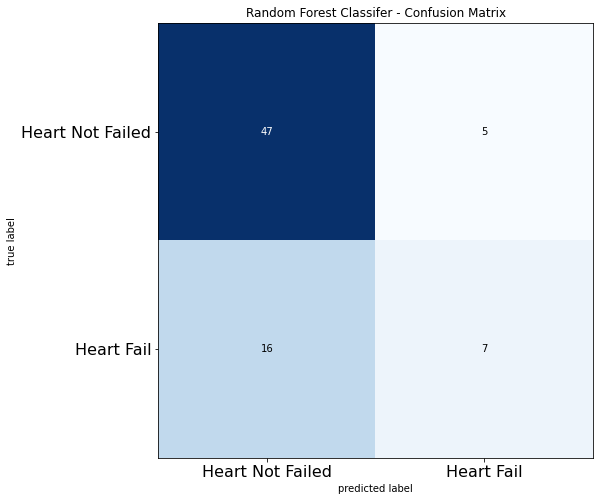

In [42]:
# define confusion matrix by y_test and X_test prediction
cm = confusion_matrix(y_test, grid_model_forest_pred)
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Random Forest Classifer - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

### Gradient Boosting Classifier

In [43]:
# define model and parameters to search by
model_gbc = GradientBoostingClassifier(random_state = 14)
params = {'n_estimators': [10,20,40,50,60,100],
         'learning_rate': [0.1,0.3,0.5,0.7,0.9],
         'n_estimators': [50,100,150,200,250],
         'max_depth': [2,3,4,5,6,7]}

# fit grid search model
grid_model_gbc = GridSearchCV(model_gbc, param_grid = params, scoring = 'roc_auc')
grid_model_gbc.fit(X_train, y_train)
grid_model_gbc_pred = grid_model_gbc.predict(X_test)
y_decision_fn_scores_acc = grid_model_gbc.decision_function(X_test)
grid_model_gbc_auc = roc_auc_score(y_test, y_decision_fn_scores_acc)

# print results
print('Test set AUC: ', grid_model_gbc_auc)
print('Grid best parameter (max. AUC): ', grid_model_gbc.best_params_)
print('Grid best score (AUC): ', grid_model_gbc.best_score_)

Test set AUC:  0.7591973244147158
Grid best parameter (max. AUC):  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Grid best score (AUC):  0.797063492063492


In [44]:
# add to aucscore list
auroc_list.append(100*grid_model_gbc_auc)

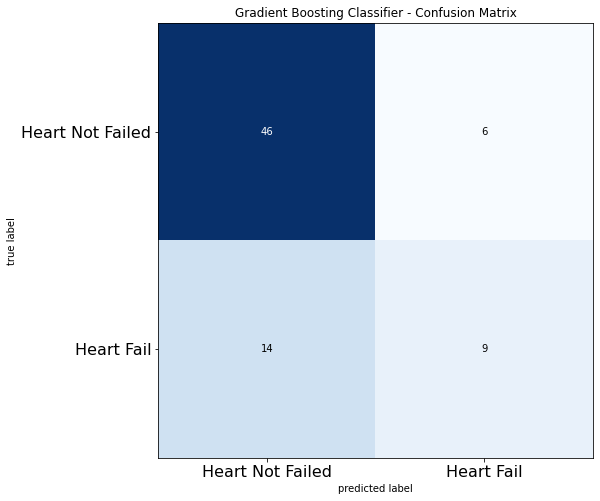

In [45]:
# define confusion matrix by y_test and X_test prediction
cm = confusion_matrix(y_test, grid_model_gbc_pred)
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', "Heart Fail"], fontsize = 16)
plt.show()

## Analysis of Best Model

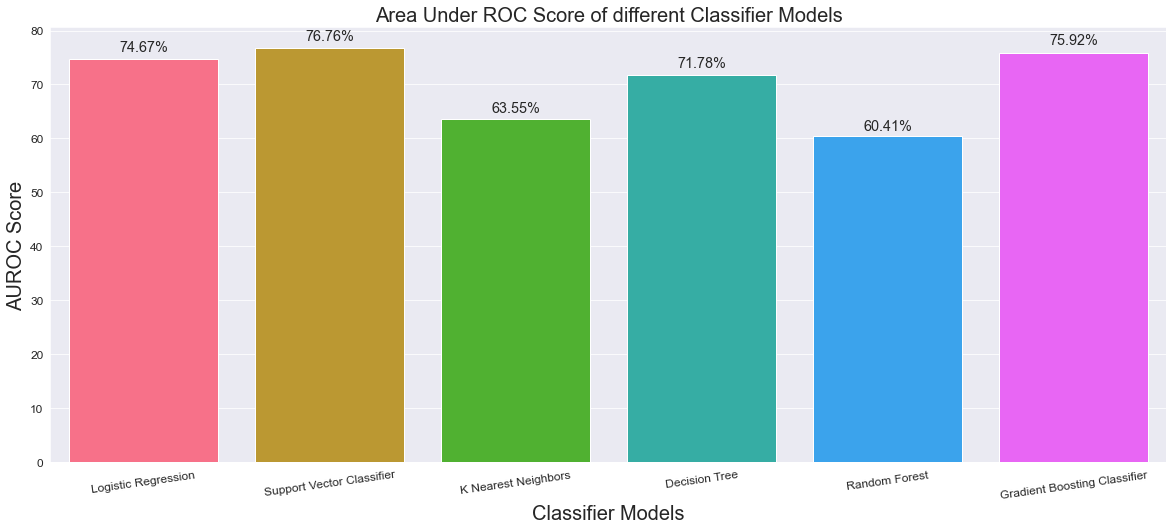

In [46]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
model_list = ['Logistic Regression', 'Support Vector Classifier', 'K Nearest Neighbors',
             'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier']
ax = sns.barplot(x=model_list, y=auroc_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('AUROC Score', fontsize = 20)
plt.title('Area Under ROC Score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

While the _Support Vector Classifier_ and _Gradient Boosting Classifier_ models have the highest AUROC score (76.76% and 75.92% respectively), some consideration must be made for the _Decision Tree_ classifer, which had the the fewest instance of False Negatives (Type II Error). Given the marginal difference in AUROC score for the _Decision Tree_ classified (71.78%) and the _Support Vector Classifier_ (76.76%), the lower rate of False Negatives should bias the end user towards using the _Decision Tree_ classifier. However, this is ultimately up to the discretion of the end user.

### Inspirations
https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction-96-rate